# **STATISTICS** : TP Données météo

Thomas Dos, Gauthier Meffe, Noa Chaze, Lisa Escaron 

On récupère le jeu de données météo : 

In [5]:
dataframe <- read.csv(file = "../donnees_meteo_synop.csv", header = TRUE, sep = ";")

In [3]:
# Visualisation du format des données :
head(dataframe)

,ID.OMM.station,Date,Pression.au.niveau.mer,Variation.de.pression.en.3.heures,Type.de.tendance.barométrique,Direction.du.vent.moyen.10.mn,Vitesse.du.vent.moyen.10.mn,Température,Point.de.rosée,Humidité,⋯,Altitude,communes..name.,communes..code.,EPCI..name.,EPCI..code.,department..name.,department..code.,region..name.,region..code.,mois_de_l_annee
,<int>,<chr>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,⋯,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>
1,7181,2016-07-12T11:00:00+02:00,101410,-30,8,230,2.9,293.35,286.55,65,⋯,336,Thuilley-aux-Groseilles,54523,CC du Pays de Colombey et du Sud Toulois,245400510,Meurthe-et-Moselle,54,Grand Est,44,7
2,81405,2017-01-08T07:00:00+01:00,101140,-140,8,240,0.5,297.25,296.25,94,⋯,4,Matoury,97307,CA du Centre Littoral,249730045,Guyane,973,Guyane,3,1
3,7627,2017-01-08T13:00:00+01:00,103380,-40,8,30,2.1,277.55,269.75,57,⋯,414,Lorp-Sentaraille,09289,CC Couserans-Pyrénées,200067940,Ariège,09,Occitanie,76,1
4,78894,2017-01-09T13:00:00+01:00,101760,0,NA,100,2.3,298.15,291.35,66,⋯,44,,,,NA,,,,NA,1
5,7020,2017-01-12T13:00:00+01:00,100580,-710,8,210,11.9,282.05,280.15,88,⋯,6,La Hague,50041,CA du Cotentin,200067205,Manche,50,Normandie,28,1
6,7280,2017-12-23T13:00:00+01:00,103830,-10,0,10,2.7,280.75,278.35,85,⋯,219,Ouges,21473,Dijon Métropole,242100410,Côte-d'Or,21,Bourgogne-Franche-Comté,27,12


On a un jeu de données météo. Chaque ligne correspond à des informations météo (pression, direction du vent, température, ...) à une date, dans une commune, à une altitude données. 

L'étude de ce jeu de données a alors pour but de construire un modèle de prédiction de la météo.

# Présentation des données

In [6]:
# Structure des données :
cat("Structure des données :\n")
str(dataframe)
cat("Grace à la structure des données présentées ci-dessus, on peut plus facilement entreprendre des analyses spécifiques quant aux mesures sélectionnées.\n")
# Résumé statistique des données :
cat("Résumé statistique des données :\n")
summary(dataframe)
cat("Le résumé statistique ci-dessus permet d'avoir une idée générale de ce que l'on attend lors de l'analyse des données.\n")

Structure des données :


'data.frame':	1719567 obs. of  82 variables:
 $ ID.OMM.station                                           : int  7181 81405 7627 78894 7020 7280 7015 7110 81408 7222 ...
 $ Date                                                     : chr  "2016-07-12T11:00:00+02:00" "2017-01-08T07:00:00+01:00" "2017-01-08T13:00:00+01:00" "2017-01-09T13:00:00+01:00" ...
 $ Pression.au.niveau.mer                                   : int  101410 101140 103380 101760 100580 103830 102280 103530 101190 101060 ...
 $ Variation.de.pression.en.3.heures                        : num  -30 -140 -40 0 -710 -10 -50 70 0 -410 ...
 $ Type.de.tendance.barométrique                            : int  8 8 8 NA 8 0 8 3 NA 8 ...
 $ Direction.du.vent.moyen.10.mn                            : int  230 240 30 100 210 10 270 80 230 220 ...
 $ Vitesse.du.vent.moyen.10.mn                              : num  2.9 0.5 2.1 2.3 11.9 2.7 3.3 2.1 0.7 7.3 ...
 $ Température                                              : num  293 297 278 298 28

 ID.OMM.station      Date           Pression.au.niveau.mer
 Min.   : 7005   Length:1719567     Min.   : 93850        
 1st Qu.: 7207   Class :character   1st Qu.:101180        
 Median : 7577   Mode  :character   Median :101600        
 Mean   :26062                      Mean   :101577        
 3rd Qu.:61976                      3rd Qu.:102090        
 Max.   :89642                      Max.   :107570        
                                    NA's   :94370         
 Variation.de.pression.en.3.heures Type.de.tendance.barométrique
 Min.   :-2840.00                  Min.   : 0.0                 
 1st Qu.:  -60.00                  1st Qu.: 2.0                 
 Median :   10.00                  Median : 3.0                 
 Mean   :   15.39                  Mean   : 4.3                 
 3rd Qu.:   90.00                  3rd Qu.: 7.0                 
 Max.   : 2990.00                  Max.   :10.0                 
 NA's   :40694                     NA's   :68236                
 Directi

Le résumé statistique ci-dessus permet d'avoir une idée générale de ce que l'on attend lors de l'analyse des données.


On veut ensuite quelques graphes pour visualiser les données.

On peut utiliser toutes nos données pour faire des moyennes. On peut par exemple sortir la température annuelle moyenne par région :

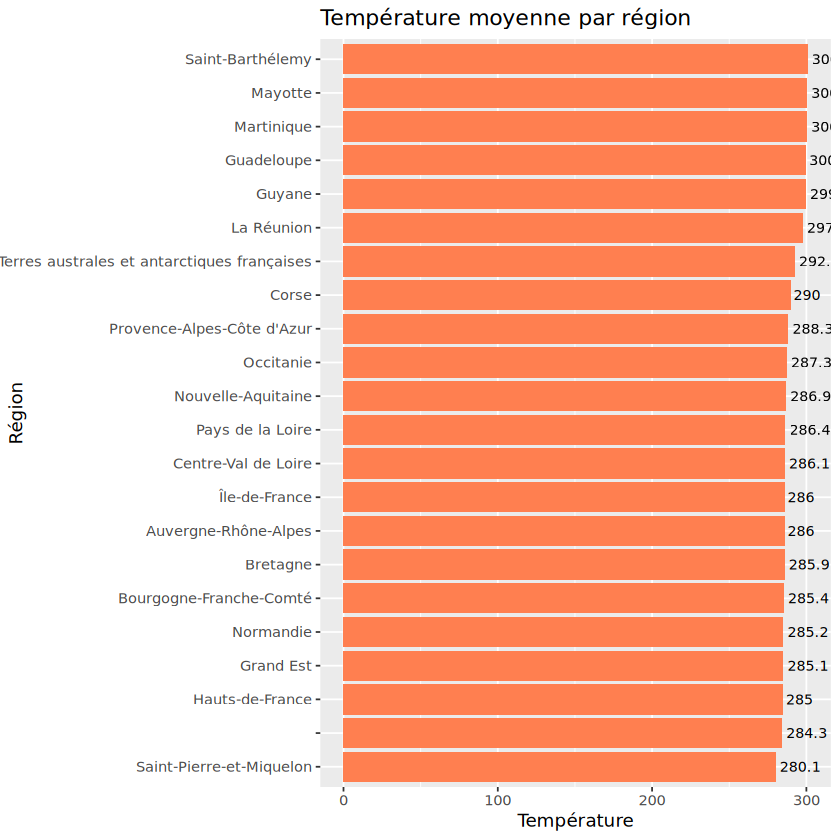

In [18]:
temp_region <- dataframe %>%
  group_by(region..name.) %>%
  summarise(temp_moy = mean(Température, na.rm = TRUE), .groups = 'drop')

ggplot(temp_region, aes(x = reorder(region..name., temp_moy), y = temp_moy)) +
  geom_col(fill = "coral") +
  geom_text(aes(label = round(temp_moy, 1)), 
            hjust = -0.1, vjust = 0.5, size = 3, color = "black") +
  coord_flip() +
  labs(title = "Température moyenne par région", x = "Région", y = "Température")
  


On peut aussi regarder le cycle annuel des températures  avec la température moyenne pour chaque mois : 

Warning message:
“Removed 626 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


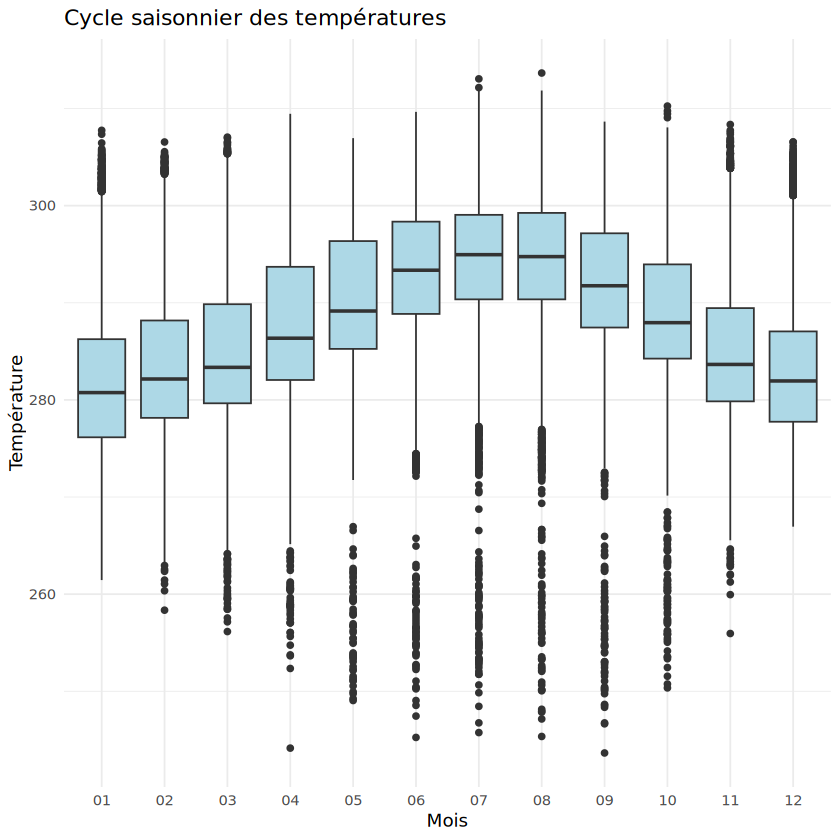

In [20]:
# Cycle annuel des températures
dataframe$mois <- format(as.POSIXct(dataframe$Date), "%m")

ggplot(dataframe %>% sample_n(50000), aes(x = factor(mois), y = Température)) +
  geom_boxplot(fill = "lightblue") +
  labs(title = "Cycle saisonnier des températures", x = "Mois", y = "Température") +
  theme_minimal()